In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#import maup
from zipfile import ZipFile
import numpy as np
import os
import shutil
import shapely.geometry

# US House

## Final File - Load

In [2]:
cd '/Users/lilyfalk/sandbox/pdv-va'

/Users/lilyfalk/sandbox/pdv-va


In [3]:
final = gpd.read_file('./vest_va_2016/va_2016_ushouse/va_2016_ushouse.shp')
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry
0,001,Accomack County,000101,Chincoteague,2,453,1319,0,2,"POLYGON Z ((-75.42507 37.89957 0.00000, -75.42..."
1,001,Accomack County,000201,Atlantic,2,144,643,0,2,"POLYGON Z ((-75.59978 37.87664 0.00000, -75.59..."
2,001,Accomack County,000202,Greenbackville,2,298,799,0,1,"POLYGON Z ((-75.49919 37.93416 0.00000, -75.49..."
3,001,Accomack County,000301,New Church,2,723,670,0,0,"POLYGON Z ((-75.64987 37.92702 0.00000, -75.64..."
4,001,Accomack County,000401,Bloxom,2,124,395,0,0,"POLYGON Z ((-75.71556 37.87513 0.00000, -75.71..."
...,...,...,...,...,...,...,...,...,...,...
2453,195,Wise County,000301,Big Stone Gap,9,479,1263,55,5,"POLYGON Z ((-82.77275 36.84962 0.00000, -82.77..."
2454,095,James City County,000202,Jamestown B (CD 2),2,8,0,0,0,"POLYGON Z ((-76.73414 37.28607 0.00000, -76.73..."
2455,095,James City County,000202,Jamestown B (CD 1),1,1242,1258,103,8,"POLYGON Z ((-76.73272 37.28612 0.00000, -76.73..."
2456,095,James City County,000504,Roberts D (CD 1),1,13,15,1,0,"POLYGON Z ((-76.74957 37.23549 0.00000, -76.74..."


# Election Results: US House

## Read in election results and append since files split accross districts

In [4]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [5]:
#Create list 1 through 11 to enable later loop to load in all 11 congressional districts
district = [str(1), str(2), str(3), str(4), str(5), str(6), str(7), str(8), str(9), str(10), str(11)]
#Load in all results, check party by district to match for this dictionary, then reload in and rename in code
candidate_to_party_dict = {'Robert Joseph Wittman': 'G16HORREP',
                           'Matthew Dew Rowe': 'G16HORDEM', 
                           'Glenda Gail Parker': 'G16HORIND',
                           'All Others': 'G16HORWRI', 
                           'Scott William Taylor': 'G16HORREP',
                           'Shaun D. Brown': 'G16HORDEM',
                           'Robert Cortez Scott': 'G16HORDEM',
                           'Martin L. Williams': 'G16HORREP',
                           'A. Donald McEachin': 'G16HORDEM',
                           'Michael L. Wade': 'G16HORREP',
                           'Tom A. Garrett, Jr': 'G16HORREP',
                           'Jane D. Dittmar': 'G16HORDEM', 
                           'Robert William Goodlatte': 'G16HORREP',
                           'Kai Degner': 'G16HORDEM',
                           'David A. Brat': 'G16HORREP',
                           'Eileen Mcneil Bedell': 'G16HORDEM',
                           'Charles Alan Hernick': 'G16HORREP',
                           'Donald Sternoff Beyer, Jr.': 'G16HORDEM', 
                           'Julio Gracia': 'G16HORIND',
                           'Howard Morgan Griffith': 'G16HORREP',
                           'Derek W. Kitts': 'G16HORDEM', 
                           'Janice Allen Boyd': 'G16HORIND',
                           'Barbara Jean Comstock': 'G16HORREP',
                           'Luann L. Bennett': 'G16HORDEM',
                           'Gerald Edward Connolly': 'G16HORDEM'}

elections_by_district = []
for i in district:
    ref = './vest_va_2016/us_house_results_by_district_2016/'
    file_name = ref + 'Virginia_Elections_Database__2016_U_S_House_General_Election_District_'+ i +'_including_precincts.csv'
    results = pd.read_csv(file_name)
    print(i, ' added to list')
    results['CON_DIST'] = i
    for col in results.columns:
        if col in candidate_to_party_dict.keys():
            col_new_name = candidate_to_party_dict.get(col)
            results = results.rename(columns = {col:col_new_name})
    elections_by_district.append(results)

1  added to list
2  added to list
3  added to list
4  added to list
5  added to list
6  added to list
7  added to list
8  added to list
9  added to list
10  added to list
11  added to list


In [6]:
df = pd.concat(elections_by_district, axis = 0)
df = df.reset_index()

df.head()

,index,County/City,Ward,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,Total Votes Cast,CON_DIST
0,0,NaN,NaN,NaN,Republican,Democratic,Independent,NaN,NaN,1
1,1,Caroline County,-,101 - Bowling Green,739,372,32,3,"1,146",1
2,2,Caroline County,-,102 - Sparta,556,307,26,4,893,1
3,3,Caroline County,-,201 - North Madison,531,450,25,2,"1,008",1
4,4,Caroline County,-,202 - South Madison,750,451,48,5,"1,254",1


In [7]:
df = df[df['County/City'] != 'TOTALS']
df['LOCALITY'] = df['County/City']
df = df.iloc[1:]
df = df.drop(['County/City', 'Ward', 'Total Votes Cast'], axis = 1)
df = df.fillna(value = 0)
df = df[(df['G16HORDEM'] != 'Democratic') & (df['G16HORREP'] != 'Republican') & (df['G16HORIND'] != 'Independent')]
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()
df['COUNTYFP'] = df['LOCALITY'].map(county_dict)

df['G16HORDEM'] = df['G16HORDEM'].map(lambda x: str(x).replace(',', ''))
df['G16HORREP'] = df['G16HORREP'].map(lambda x: str(x).replace(',', ''))
df['G16HORIND'] = df['G16HORIND'].map(lambda x: str(x).replace(',', ''))
df['G16HORWRI'] = df['G16HORWRI'].map(lambda x: str(x).replace(',', ''))

df['G16HORDEM'] = df['G16HORDEM'].astype(str).astype(float).astype(int)
df['G16HORREP'] = df['G16HORREP'].astype(str).astype(float).astype(int)
df['G16HORIND'] = df['G16HORIND'].astype(str).astype(float).astype(int)
df['G16HORWRI'] = df['G16HORWRI'].astype(str).astype(float).astype(int)

df['CON_DIST'] = df['CON_DIST'].astype(str)

df.head()

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP
1,1,101 - Bowling Green,739,372,32,3,1,Caroline County,033
2,2,102 - Sparta,556,307,26,4,1,Caroline County,033
3,3,201 - North Madison,531,450,25,2,1,Caroline County,033
4,4,202 - South Madison,750,451,48,5,1,Caroline County,033
5,5,301 - Port Royal,387,186,21,2,1,Caroline County,033


### Check column totals

In [8]:
column_list = ['G16HORREP', 'G16HORDEM', 'G16HORIND', 'G16HORWRI']
for val in column_list:
    vote_dif = df[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

G16HORREP: EQUAL
G16HORDEM: EQUAL
G16HORIND: EQUAL
G16HORWRI: EQUAL


In [9]:
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df.groupby(['LOCALITY']).sum()[i]-final.groupby(['LOCALITY']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


# Re allocate absentee votes

### cd with county to better reallocate absentee

In [10]:
cd_abs_prov_prec = df[((df['Pct'].map(lambda x: 'Absentee' in str(x))) &(df['Pct'].map(lambda x: 'CD' in str(x)))) | ((df['Pct'].map(lambda x: 'Provisional' in str(x))) & (df['Pct'].map(lambda x: 'CD' in str(x))))]
county_with_cd_nec_list = list(cd_abs_prov_prec['COUNTYFP'])
df['Pct'].str.slice(start = -5)[df['COUNTYFP'].isin(county_with_cd_nec_list)].value_counts()

Series([], Name: Pct, dtype: int64)

In [11]:
df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP
13,13,Ab - Central Absentee Precinct,669,556,58,5,1,Caroline County,033
14,14,Provisional,5,6,0,0,1,Caroline County,033
19,19,Ab - Central Absentee Precinct,368,228,21,0,1,Essex County,057
20,20,Provisional,0,1,0,0,1,Essex County,057
25,25,Ab - Central Absentee Precinct,362,193,23,1,1,Fauquier County,061
...,...,...,...,...,...,...,...,...,...
2723,117,Provisional,0,194,0,21,11,Fairfax County,059
2730,124,Ab - Central Absentee Precinct,0,1891,0,207,11,Fairfax City,600
2731,125,Provisional,0,6,0,1,11,Fairfax City,600
2771,165,Ab - Central Absentee Precinct,0,14610,0,1181,11,Prince William County,153


In [12]:
(df['COUNTYFP'] + '-' + df['CON_DIST']).value_counts()

059-11    117
810-2     100
107-10     95
059-8      82
087-7      69
         ... 
685-10      5
830-2       4
530-6       3
678-6       3
720-9       2
Length: 149, dtype: int64

In [13]:
df['countyfp_cd'] = df['COUNTYFP'] + '-' + df['CON_DIST']

## Absentee Reallocation

In [14]:
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['countyfp_cd']).sum()

In [15]:
groupby_county_df_tot = df.groupby(['countyfp_cd']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('countyfp_cd').sum()

In [16]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
groupby_absentee_and_prov_tot.reset_index(inplace=True,drop=False)
groupby_county_tot_no_absentee.reset_index(inplace=True,drop=False)

to_dole_out_totals = groupby_absentee_and_prov_tot.copy()
precinct_specific_totals = groupby_county_tot_no_absentee.copy()

## PH CODE for vote allocation

#countyfp_cd
#df_no_absent_or_provisional

#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row["countyfp_cd"]
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals["countyfp_cd"]==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals["countyfp_cd"]==county_id][race]
        #Get the vote totals for this race in this precinct
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(["countyfp_cd"]).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals["countyfp_cd"].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals["countyfp_cd"]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated["countyfp_cd"]==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]

In [17]:
for val in column_list:
    vote_dif = df_with_absentee_reallocated[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")
        
        
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df_with_absentee_reallocated.groupby(['LOCALITY']).sum()[i]-final.groupby(['LOCALITY']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

G16HORREP: EQUAL
G16HORDEM: EQUAL
G16HORIND: EQUAL
G16HORWRI: EQUAL
Counties with differences printed below:

All other races in all counties are equal


# Shapefile

In [18]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [19]:
county_fips = []
for directory in os.listdir('./vest_va_2016/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])

proj = final.crs

county_vtds = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    print(i, ' added to list')
    county_vtds.append(vtd_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

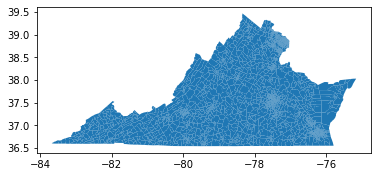

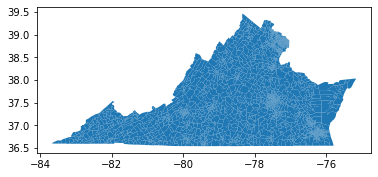

In [20]:
global shp
shp = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

shp.plot()
final.plot()

### **Load in cd shapefile to enable splits later on**

In [21]:
county_cd = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    cd_ref = ref + i + '/PVS_19_v2_cd_' + i + '.shp' 
    cd_shp = gpd.read_file(cd_ref)
    print(i, ' added to list')
    county_cd.append(cd_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

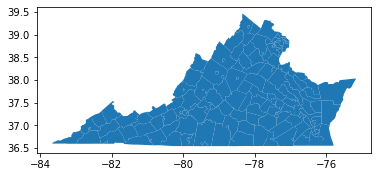

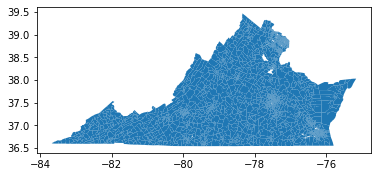

In [22]:
global cd
cd = gpd.GeoDataFrame(pd.concat(county_cd, axis = 0) , crs = proj) 
cd.plot()

overlay = gpd.overlay(cd, shp, how = 'union', make_valid = True, keep_geom_type = True)
overlay.plot()

# Unique ID Across Files

## Begin by getting VEST's final gdf and df to have common identifier

In [23]:
final.shape

(2458, 10)

In [24]:
df_with_absentee_reallocated.shape

(2461, 22)

In [25]:
(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)).nunique()

2435

In [26]:
len(set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)) - set(shp['COUNTYFP'] + shp['VTDST'].str.slice(start = 3)))

24

In [27]:
(df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['Pct'].str.slice(stop = 3)).nunique()

2434

In [28]:
len(set((df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['Pct'].str.slice(stop = 3))) - set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)))

360

In [29]:
len(set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)) - set((df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['Pct'].str.slice(stop = 3))))

361

In [30]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)

In [31]:
#Make election df format match VEST's 
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [32]:
#Apply function to vtdst column of df
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
#Check to make sure that funtion worked and no leading '-' remain in ids in df
df_with_absentee_reallocated[df_with_absentee_reallocated['vtdst'].str.slice(start = -1) == '-'] 

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_add,G16HORDEM_rem,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst


In [33]:
#With new vtdst code, make unique id in df with county fips and the vtdst
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['vtdst']

In [34]:
#in preparation for creating matching unique id in vest's final df, check difference between equivalent set in final and in the df
set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)) - set((df_with_absentee_reallocated['unique_id']))

{'059700'}

In [35]:
#Match result above was good, so go ahead and create matching unique id in final gdf
final['unique_id'] = final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)

In [36]:
final['unique_id'].nunique()

2435

In [37]:
#Because 'unique_id' does not account for all rows in the df/gdf, add congressional district to the end to make unique by CD as well
df_with_absentee_reallocated['unique_id_1'] = df_with_absentee_reallocated['unique_id'] + '-' + df_with_absentee_reallocated['CON_DIST']
final['unique_id_1'] = final['unique_id'] + '-' + final['CON_DIST']

In [38]:
final['unique_id_1'].nunique()

2458

In [39]:
df_with_absentee_reallocated['unique_id_1'].nunique()

2461

In [40]:
#Again, check differences between the two data sets
set(final['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1'])

{'059700-11'}

In [41]:
set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1'])

{'059925-11', '550019-3', '550045-3', '800403-3'}

Check values that are in raw election results not in final file. Notice that each precinct has 0 votes accross the board for each candidate

In [42]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id_1'].isin(list(set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1'])))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
467,11,19 - Jolliff,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,019,550019,550019-3
485,29,45 - Sunray II,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,045,550045,550045-3
667,211,403 - Southside,0.0,0.0,0.0,0.0,3,Suffolk City,800,800-3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,403,800403,800403-3
2719,113,925 - Old Mill,0.0,0.0,0.0,0.0,11,Fairfax County,059,059-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,925,059925,059925-11


## Consider SHP + overlay unique id to match df and final gdf

In [43]:
shp['unique_id'] = shp['COUNTYFP'] + shp['VTDST'].str.slice(start = 3)

Notice below that the raw shp does not have a CD column, which is why when comparing sets, I compared IDs with no CD, even though it is a more limited list.

In [44]:
shp.head()

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry,unique_id
0,51,580,000101,Precinct 1-1,A,00,None,None,None,None,Precinct 1-1,90,N,None,G5240,"POLYGON Z ((-80.00136 37.78983 0.00000, -80.00...",580101
1,51,580,000201,Precinct 2-1,A,00,None,None,None,None,Precinct 2-1,90,N,None,G5240,"POLYGON Z ((-79.99129 37.79115 0.00000, -79.99...",580201
2,51,580,000301,Precinct 3-1,A,00,None,None,None,None,Precinct 3-1,90,N,None,G5240,"POLYGON Z ((-79.99661 37.78701 0.00000, -79.99...",580301
3,51,580,000401,Precinct 4-1,A,00,None,None,None,None,Precinct 4-1,90,N,None,G5240,"POLYGON Z ((-79.99797 37.78069 0.00000, -79.99...",580401
4,51,580,000501,Precinct 5-1,A,00,None,None,None,None,Precinct 5-1,90,N,None,G5240,"POLYGON Z ((-80.00899 37.76259 0.00000, -80.00...",580501


In [45]:
len(set(shp['unique_id']) - set(final['unique_id']))

50

In [46]:
len(set(final['unique_id']) - set(shp['unique_id']))

24

Use overlay shp because it does have the CD column available... **Question** - will this impact the geometry matches? - CD lines cut through precincts in a bad way?

In [47]:
overlay['unique_id'] = overlay['COUNTYFP_1'] + overlay['VTDST'].str.slice(start = 3) 

In [48]:
overlay['unique_id'].nunique()

2447

In [49]:
print(overlay.shape)
print(shp.shape)

(2453, 43)
(2462, 17)


In [50]:
print(set(overlay['unique_id']) - set(shp['unique_id']))
print(len(set(shp['unique_id'])-set(overlay['unique_id'])))

set()
14


In order to account for the precincts in shp not in overlay, join the two

In [51]:
overlay.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'CDFP', 'CDTYP', 'NAMELSAD_1', 'LSAD_1',
       'PARTFLG', 'CHNG_TYPE_1', 'EFF_DATE', 'NEW_CODE', 'RELTYPE1',
       'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5', 'REL_ENT1', 'REL_ENT2',
       'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1', 'JUSTIFY_1', 'CDSESSN',
       'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1', 'STATEFP_2', 'COUNTYFP_2', 'VTDST',
       'NAMELSAD_2', 'VTDI', 'LSAD_2', 'CHNG_TYPE_2', 'ORIG_NAME', 'ORIG_CODE',
       'RELATE_2', 'NAME_2', 'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC',
       'geometry', 'unique_id'],
      dtype='object')

In [52]:
overlay_w_shp = gpd.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)
overlay_w_shp.shape

<ipython-input-52-7a853ff08c61>:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  overlay_w_shp = gpd.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)


(2469, 59)

In [53]:
#Inorder to compare geometries later, need to make the column that has the overlay geometries "geometry" instead of "geometry_x". Then, for the spots where that value is null, insert the shp geometry.
overlay_w_shp['geometry'] = overlay_w_shp['geometry_x']
overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry'] = overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry_y']

In [54]:
#Drop the old geo columns to avoid confusion
overlay_w_shp = overlay_w_shp.drop(['geometry_x', 'geometry_y'], axis = 1)
overlay_w_shp['unique_id'].nunique()

2461

In [55]:
overlay_w_shp.shape

(2469, 58)

In [56]:
final.shape

(2458, 12)

`CON_DIST` in final and df does not have leading zero, so need to make the same in overlay gdf

In [57]:
overlay.CDFP.value_counts()

09    339
05    306
04    252
06    229
07    216
01    216
10    208
03    195
02    167
08    166
11    159
Name: CDFP, dtype: int64

In [58]:
overlay.CDFP.str.lstrip('0')

0        9
1        9
2        9
3        9
4        9
        ..
2448    11
2449    11
2450    11
2451    11
2452    11
Name: CDFP, Length: 2453, dtype: object

In [59]:
overlay_w_shp.CDFP.value_counts()

09    341
05    306
04    252
06    229
07    216
01    216
10    208
03    195
02    167
08    166
11    159
Name: CDFP, dtype: int64

In [60]:
overlay_w_shp.CDFP.str.lstrip('0')

0         9
1         9
2         9
3         9
4         9
       ... 
2464    NaN
2465    NaN
2466    NaN
2467    NaN
2468    NaN
Name: CDFP, Length: 2469, dtype: object

In [61]:
overlay_w_shp['unique_id_1'] = overlay_w_shp['unique_id'] + '-' + overlay_w_shp['CDFP'].str.lstrip('0')

In [62]:
overlay_w_shp.unique_id_1.nunique()

2452

In [63]:
overlay_w_shp.shape

(2469, 59)

In [64]:
overlay_w_shp.unique_id.nunique()

2461

In [65]:
#unique_id has more unique values than unique_id_1 when there are fewer components
overlay_w_shp[['unique_id', 'unique_id_1']].head()

,unique_id,unique_id_1
0,580101,580101-9
1,580201,580201-9
2,580301,580301-9
3,580401,580401-9
4,580501,580501-9


In [66]:
(overlay_w_shp['unique_id_1'].value_counts()[overlay_w_shp['unique_id_1'].value_counts()>1]).index

Index(['121032-9'], dtype='object')

In [67]:
overlay_w_shp[['unique_id', 'unique_id_1']][overlay_w_shp.unique_id_1 == '121032-9']

,unique_id,unique_id_1
67,121032,121032-9
68,121032,121032-9
69,121032,121032-9
70,121032,121032-9


In [68]:
len(set(overlay_w_shp.unique_id_1) - set(final.unique_id_1))

59

In [69]:
len(set(final.unique_id_1) - set(overlay_w_shp.unique_id_1))

64

## Create unique_id(2) to account for doubles in unique_id list, esp since better match rate with shp with unique id

In [70]:
df_id_count = df_with_absentee_reallocated['unique_id'].value_counts()
df_double_list = df_id_count[df_id_count > 1].index
final_id_count = final.unique_id.value_counts()
final_double_list = final_id_count[final_id_count > 1].index
print('Double in df, not in final: ', set(df_double_list) - set(final_double_list))
print('Double in final, not in df: ',set(final_double_list) - set(df_double_list))
print(df_double_list)

Double in df, not in final:  {'550045', '800403', '059925', '550019'}
Double in final, not in df:  set()
Index(['800504', '089304', '550019', '177103', '650215', '800403', '089505',
       '550045', '095202', '177402', '059513', '177704', '710104', '153110',
       '059925', '177702', '177703', '800602', '153609', '153112', '800302',
       '550020', '153312', '800404', '095504', '153210', '710101'],
      dtype='object')


### Investigate values that double in df not doubled in final that need to be merged to other items

In [71]:
df_with_absentee_reallocated[df_with_absentee_reallocated.unique_id.isin(set(df_double_list) - set(final_double_list))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
467,11,19 - Jolliff,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,019,550019,550019-3
485,29,45 - Sunray II,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,045,550045,550045-3
667,211,403 - Southside,0.0,0.0,0.0,0.0,3,Suffolk City,800,800-3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,403,800403,800403-3
693,14,19 - Jolliff,973.0,393.0,0.0,9.0,4,Chesapeake City,550,550-4,...,73.0,0.0,0.0,0.0,1.0,0.339901,1.0,019,550019,550019-4
703,24,45 - Sunray II,262.0,412.0,0.0,6.0,4,Chesapeake City,550,550-4,...,77.0,0.0,0.0,0.0,1.0,0.837438,0.0,045,550045,550045-4
924,245,403 - Southside,98.0,742.0,0.0,0.0,4,Suffolk City,800,800-4,...,127.0,0.0,0.0,0.0,0.0,0.000000,0.0,403,800403,800403-4
2441,53,925 - Old Mill,702.0,926.0,0.0,5.0,10,Fairfax County,059,059-10,...,264.0,0.0,0.0,0.0,1.0,0.337580,1.0,925,059925,059925-10
2719,113,925 - Old Mill,0.0,0.0,0.0,0.0,11,Fairfax County,059,059-11,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,925,059925,059925-11


In [72]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '800403']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
667,211,403 - Southside,0.0,0.0,0.0,0.0,3,Suffolk City,800,800-3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,403,800403,800403-3
924,245,403 - Southside,98.0,742.0,0.0,0.0,4,Suffolk City,800,800-4,...,127.0,0.0,0.0,0.0,0.0,0.0,0.0,403,800403,800403-4


In [73]:
final[(final['COUNTYFP'] == '800') &  (final['PRECINCT'].str.contains('SOUTH'))] 

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1
2061,800,Suffolk City,000403,SOUTHSIDE,4,742,98,0,0,"POLYGON Z ((-76.62006 36.71008 0.00000, -76.62...",800403,800403-4


- 800403-3 has zero votes and not present in final - cut

In [74]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '550045']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
485,29,45 - Sunray II,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,045,550045,550045-3
703,24,45 - Sunray II,262.0,412.0,0.0,6.0,4,Chesapeake City,550,550-4,...,77.0,0.0,0.0,0.0,1.0,0.837438,0.0,045,550045,550045-4


In [75]:
final[final.unique_id == '550045']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1
1696,550,Chesapeake City,000045,Sunray II,4,413,262,0,6,"POLYGON Z ((-76.42973 36.76676 0.00000, -76.42...",550045,550045-4


- 550045-3 has zero votes in df and not present in final - cut

In [76]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '059925']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
2441,53,925 - Old Mill,702.0,926.0,0.0,5.0,10,Fairfax County,059,059-10,...,264.0,0.0,0.0,0.0,1.0,0.33758,1.0,925,059925,059925-10
2719,113,925 - Old Mill,0.0,0.0,0.0,0.0,11,Fairfax County,059,059-11,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,925,059925,059925-11


In [77]:
final[final.unique_id == '059925']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1
638,059,Fairfax County,000925,Old Mill,10,926,703,0,5,"POLYGON Z ((-77.47726 38.81506 0.00000, -77.47...",059925,059925-10


- 059925-11 has zero votes in df and not present in final - cut

In [78]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '550019']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,...,G16HORDEM_floor,G16HORIND_add,G16HORIND_rem,G16HORIND_floor,G16HORWRI_add,G16HORWRI_rem,G16HORWRI_floor,vtdst,unique_id,unique_id_1
467,11,19 - Jolliff,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,019,550019,550019-3
693,14,19 - Jolliff,973.0,393.0,0.0,9.0,4,Chesapeake City,550,550-4,...,73.0,0.0,0.0,0.0,1.0,0.339901,1.0,019,550019,550019-4


In [79]:
final[final['unique_id'] == '550019']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1
1688,550,Chesapeake City,000019,Jolliff,4,393,973,0,9,"POLYGON Z ((-76.46335 36.77079 0.00000, -76.46...",550019,550019-4


- 550019-3 has zero votes in df and not present in final - cut

#### cut out df values not present in final

In [80]:
df_cut_unique_id_1_list = ['800403-3', '550045-3', '059925-11', '550019-3']
df_with_absentee_reallocated = df_with_absentee_reallocated[~df_with_absentee_reallocated['unique_id_1'].isin(df_cut_unique_id_1_list)]

In [81]:
df_with_absentee_reallocated.shape

(2457, 25)

In [82]:
df_id_count = df_with_absentee_reallocated['unique_id'].value_counts()
df_double_list = df_id_count[df_id_count > 1].index
final_id_count = final.unique_id.value_counts()
final_double_list = final_id_count[final_id_count > 1].index
print('Double in df, not in final: ', set(df_double_list) - set(final_double_list))
print('Double in final, not in df: ',set(final_double_list) - set(df_double_list))
print(df_double_list)

Double in df, not in final:  set()
Double in final, not in df:  set()
Index(['153110', '177402', '059513', '710104', '177704', '089304', '800504',
       '177103', '177702', '153210', '095504', '550020', '153112', '153312',
       '800404', '800302', '710101', '177703', '650215', '800602', '089505',
       '153609', '095202'],
      dtype='object')


See that after running that double lists match up

In [83]:
# make new column unique_id_2 with unique id everywhere except where double values, items replaced with unique_id_1 values
df_with_absentee_reallocated['unique_id_2'] = df_with_absentee_reallocated['unique_id']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(final_double_list), 'unique_id_2'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(final_double_list), 'unique_id_1']
final['unique_id_2'] = final['unique_id']
final.loc[final['unique_id'].isin(final_double_list), 'unique_id_2'] = final.loc[final['unique_id'].isin(final_double_list), 'unique_id_1']

### Apply double to overlay_w_shp as well

In [84]:
overlay_w_shp['unique_id_2'] = overlay_w_shp['unique_id']
overlay_w_shp.loc[overlay_w_shp['unique_id'].isin(df_double_list), 'unique_id_2'] = overlay_w_shp.loc[overlay_w_shp['unique_id'].isin(df_double_list), 'unique_id_1']

In [85]:
len(set(overlay_w_shp.unique_id_2) - set(final.unique_id_2))

52

In [86]:
len(set(df_with_absentee_reallocated.unique_id_2) -  set(overlay_w_shp.unique_id_2) )

54

In [87]:
#Recall... so we see that adding more unique ids has not worsened the situation...
print(len(set(overlay_w_shp.unique_id) - set(final.unique_id)))
print(len(set(df_with_absentee_reallocated.unique_id) -  set(overlay_w_shp.unique_id)))

50
24


## Begin hand matching work comparing in Excel, then plotting here

In [88]:
overlay_w_shp.shape

(2469, 60)

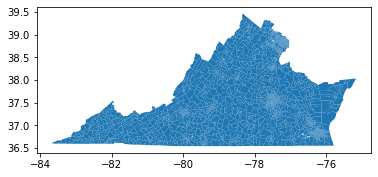

In [89]:
overlay_w_shp['geometry'].plot()

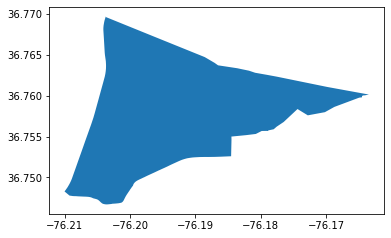

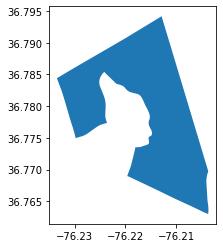

In [90]:
overlay_w_shp['geometry'][(overlay_w_shp['unique_id_2'] == '550065')].plot() #looks like it could be bottom sliver of final id
final[final['unique_id_2'] == '550040'].plot()

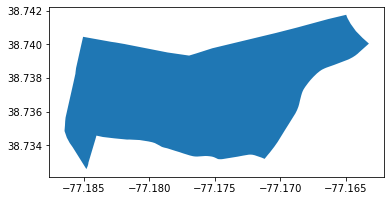

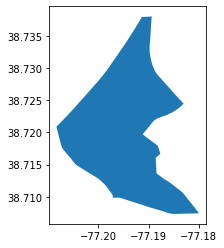

In [91]:
#Example of comparing individual precinct id to test for match
shp[(shp['unique_id'] == '059630')].plot()
final[(final['unique_id_2'] == '059625')].plot()

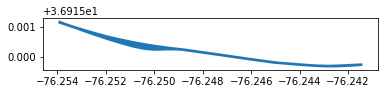

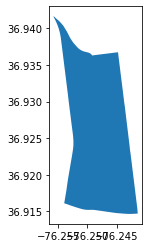

In [92]:
overlay_w_shp[overlay_w_shp.unique_id_1 == '710511-3'].plot() #looks like it could be bottom sliver of final id
final[final['unique_id_1'] == '710511-2'].plot()

### Based on hand matching, find that the following modifications should be made

In [93]:
overlay_w_shp_to_df_dict = {
    '077011': '077401',
    '077012': '077401',
    '095041': '095104',
  #  '095042-2': '095104',
    '107422': '107419',
    '153061': '153106',
    '191021': '191702',
    '191022': '191702',
    '520041':  '520004',
    '520042':  '520004',
    '685031': '685003',
    '685032': '685003',
}

In [94]:
len(overlay_w_shp_to_df_dict)

11

Map values using hand-made dict above.

In [95]:
overlay_w_shp.loc[overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.keys()), 'unique_id_2'] = overlay_w_shp.loc[overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.keys()), 'unique_id_2'].map(overlay_w_shp_to_df_dict)

In [96]:
overlay_w_shp[overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.keys())]

,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,...,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,geometry,unique_id_1,unique_id_2


In [97]:
len(set(overlay_w_shp.unique_id_2) - set(final.unique_id_2))

41

In [98]:
len(set(final.unique_id_2) - set(overlay_w_shp.unique_id_2))

47

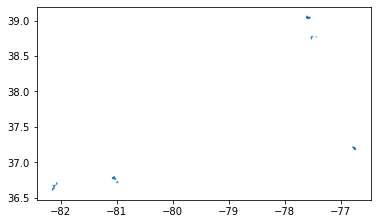

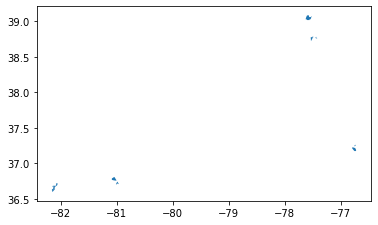

In [99]:
overlay_w_shp['geometry'][overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.values())].plot()
final[final['unique_id_2'].isin(overlay_w_shp_to_df_dict.values())].plot()

Below we see the set of precincts in `VEST's final file` that do not appear in the `shapefile from the Census`, and plotted below is those in the `Census shapefile` not in `VEST's final file`. Overall, can see visually that they do not overlap well, and so it makes sense that they do not have a clear match. 

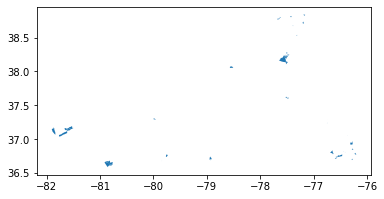

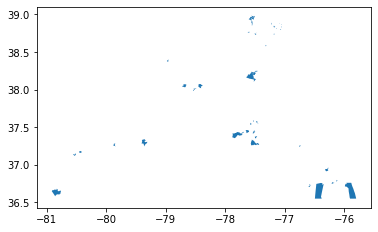

In [100]:
final[final['unique_id_2'].isin(set(final['unique_id_2']) - set(overlay_w_shp['unique_id_2']))].plot()
overlay_w_shp['geometry'][overlay_w_shp['unique_id_2'].isin(set(overlay_w_shp['unique_id_2']) - set(final['unique_id_2']))].plot()

## Join election results and shapefile

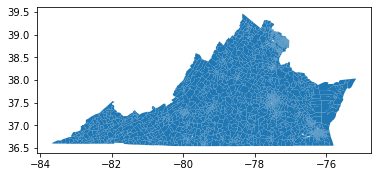

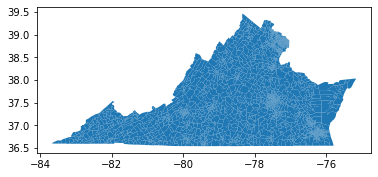

In [101]:
join = gpd.GeoDataFrame(pd.merge(df_with_absentee_reallocated, overlay_w_shp, on = 'unique_id_2', how = 'outer'), crs = proj)
join.plot()
final.plot()

In [102]:
join.shape

(2516, 85)

# Validation

## Shapefile validation

In [103]:
shp_final_merge = pd.merge(join, final, on = 'unique_id_2', how = 'outer', suffixes = ['_x', '_y'],indicator=True)
shp['geometry'].geom_almost_equals(final['geometry'], decimal = 0)

/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0       False
0       False
0       False
0       False
0       False
        ...  
2453    False
2454    False
2455    False
2456    False
2457    False
Length: 4676, dtype: bool

In [104]:
both = shp_final_merge[shp_final_merge["_merge"]=="both"]
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=final.crs)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=final.crs)
source_geoms = source_geoms.to_crs(final.crs)
vest_geoms = vest_geoms.to_crs(final.crs)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     1777
False     689
dtype: int64


In [105]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"Pct"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

<ipython-input-105-787353f6cb91>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area = float(diff.area/10e6)


In [106]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(2466, 1)
1740 precincts w/ a difference of 0 km^2
679 precincts w/ a difference between 0 and .1 km^2
0 precincts w/ a difference between .1 and .5 km^2
0 precincts w/ a difference between .5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2


## Precint level election result check

In [107]:
final_df_merge = pd.merge(join, final, how = 'outer', on = 'unique_id_2')

In [108]:
col_list = ['G16HORREP', 'G16HORDEM', 'G16HORIND', 'G16HORWRI']

In [109]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["Pct"]), "(V)","{:.>5}".format(int(df.iloc[j][right_Data]))," (S){:.>5}".format(int(df.iloc[j][left_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["Pct"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["Pct"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [110]:
validater_row(final_df_merge, col_list)

G16HORREP .....................................................101 - Bowling Green (V) ..814  (S)..813 (D):    1
G16HORREP ............................................................102 - Sparta (V) ..611  (S)..612 (D):   -1
G16HORDEM .....................................................201 - North Madison (V) ..497  (S)..496 (D):    1
G16HORREP .....................................................202 - South Madison (V) ..826  (S)..825 (D):    1
G16HORREP ..........................................................302 - Woodford (V) ..858  (S)..857 (D):    1
G16HORREP .....................................................402 - Carmel Church (V) ..246  (S)..247 (D):   -1
G16HORREP ..............................................................602 - Lake (V) ..544  (S)..545 (D):   -1
G16HORDEM ..............................................................602 - Lake (V) ..336  (S)..337 (D):   -1
G16HORREP ...........................................................102 - Catlett (V) .1655  (S

In [112]:
df.head()

,0
0,0.000000e+00
1,4.831260e-12
2,0.000000e+00
3,0.000000e+00
4,1.940532e-12
